In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.getipython import get_ipython
from IPython.display import Javascript
import pandas as pd

In [71]:
from load_results import load_results
from load_results import get_list_of_test_runs
from load_results import get_list_of_projects
from load_results import load_results_for_all_runs
from load_results import get_percentage_of_queries_with_correct_results
from load_results import plot_chance_of_getting_correct_result_in_n_lines
from load_results import get_percentage_of_examples_with_correct_results
from load_results import get_average_position_of_a_correct_results

projects = get_list_of_projects()
list_of_test_runs = get_list_of_test_runs()
list_of_test_runs

['initial test']

In [72]:
examples = load_results(list_of_test_runs[0])

## Quality of example cases

(array([20.,  0.,  0.,  0.,  0.,  2.,  9., 13.,  2.,  0.,  0.,  0.,  4.,
        26., 41., 21.,  6.,  3.,  4.,  8., 20., 64., 59., 25.,  4.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ,
        41.8, 45.6, 49.4, 53.2, 57. , 60.8, 64.6, 68.4, 72.2, 76. , 79.8,
        83.6, 87.4, 91.2, 95. ]),
 <BarContainer object of 25 artists>)

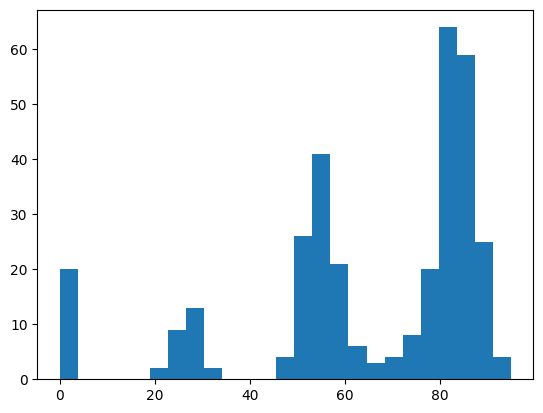

In [73]:
plt.hist([x['qualityScore'] for x in examples], 25)

### Total number of examples

In [74]:
len(examples)

331

### Number of examples after quality cutoff

In [75]:
MINIMUM_EXAMPLE_QUALITY = 75
examples = [example for example in examples if example['qualityScore'] >= MINIMUM_EXAMPLE_QUALITY]
len(examples)

175

(array([ 9., 12., 15., 24., 30., 52., 13., 10.,  6.,  4.]),
 array([75., 77., 79., 81., 83., 85., 87., 89., 91., 93., 95.]),
 <BarContainer object of 10 artists>)

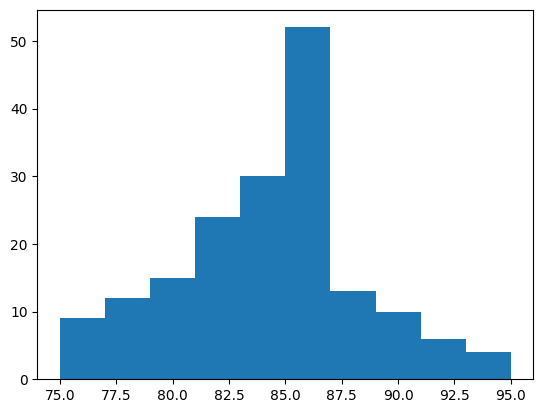

In [82]:
plt.hist([x['qualityScore'] for x in examples], 10)

## List of test runs

In [77]:
all_results = load_results_for_all_runs(MINIMUM_EXAMPLE_QUALITY)
df = pd.DataFrame(all_results, columns=["Test run name", "Data", "Engine"])
df.drop(columns=["Data"])

,Test run name,Engine
0,random,random
1,initial test,seagoat


## List of projects

## Comparison of accuracy between test runs

In [78]:
def generate_filter(project):
    return lambda result: result['repo']['name'] == project

project_filters = [
    ['All projects', lambda _: True],
] + [[project, generate_filter(project)] for project in projects]

results_filtered_by_project_filter = [
    [
        project_title,
        [[run_name, [result for result in result_data if filter_function(result)], engine] for run_name, result_data, engine in all_results],
    ]
    for project_title, filter_function in project_filters
]

for project_title, filtered_results in results_filtered_by_project_filter:
    df = pd.DataFrame(filtered_results, columns=["Test run name", "Data", "Engine"])
    df['Examples'] = df.apply(lambda row: len(row['Data']), axis=1)
    df['Queries'] = df.apply(lambda row: sum([len(x['queries']) for x in row['Data']]), axis=1)
    df['Query success %'] = df.apply(get_percentage_of_queries_with_correct_results, axis=1).apply(lambda x: "{:.2%}".format(x))
    df['Workflow success %'] = df.apply(get_percentage_of_examples_with_correct_results, axis=1).apply(lambda x: "{:.2%}".format(x))
    df['Average position of result'] = df.apply(get_average_position_of_a_correct_results, axis=1)
    
    display(df.drop(columns=["Data"]).style.set_caption(project_title))

,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,175,1232,0.41%,2.86%,51.400000
1,initial test,seagoat,175,1232,38.31%,76.57%,35.076271


,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,101,707,0.57%,3.96%,48.000000
1,initial test,seagoat,101,707,35.08%,72.28%,33.306452


,Test run name,Engine,Examples,Queries,Query success %,Workflow success %,Average position of result
0,random,random,74,525,0.19%,1.35%,65.000000
1,initial test,seagoat,74,525,42.67%,82.43%,37.035714


## Chance of correct result by line N

### By test run

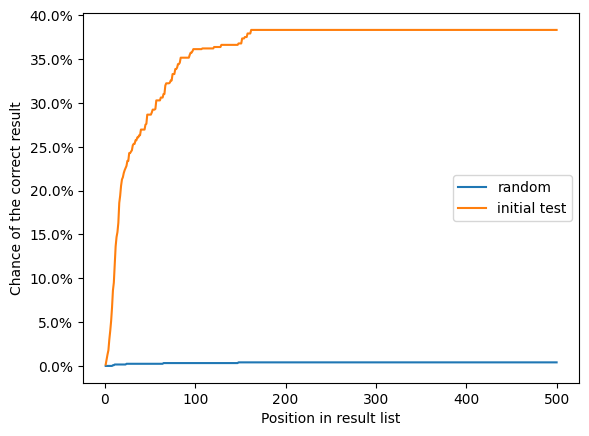

In [79]:
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: test_run)

### By project

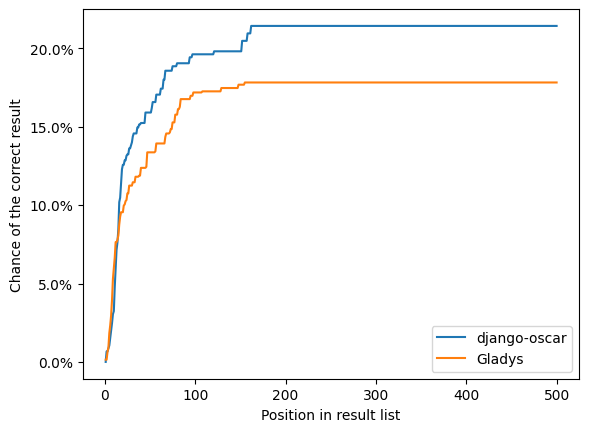

In [80]:
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: example['repo']['name'])

### By file extension

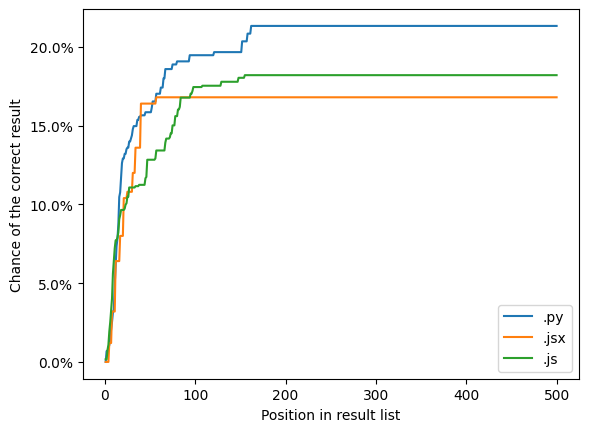

In [81]:
import os
plot_chance_of_getting_correct_result_in_n_lines(all_results, lambda test_run, query, engine, example: os.path.splitext(example['targetCode']['path'])[1])